# Feature Engineering

### Inputs

### Outputs

### Objectives

------------------

Get current directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/concrete-strength/jupyter_notebooks'

Change current directory to parent directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/concrete-strength'

-------------------------

## Load dataset with target feature of concrete strength dropped

In [4]:
import pandas as pd
df_train = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv").drop(['csMPa'], axis=1)
df_train.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,480.0,0.0,0.0,192.0,0.0,936.0,721.0,28
1,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28
2,303.6,139.9,0.0,213.5,6.2,895.5,722.5,28


In [5]:
df_test = pd.read_csv("outputs/datasets/cleaned/TestSetCleaned.csv")
df_test.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3,26.06
1,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
2,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30


Transformations

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import pingouin as pg 
from feature_engine import transformation as vt

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [7]:
def calculate_skewness_and_kurtosis(df, col):
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

def distributions(df):
    for col in df.columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        sns.histplot(data=df, x=col, kde=True, ax=axes[0])
        pg.qqplot(df[col], dist='norm', ax=axes[1])
        plt.show()
        calculate_skewness_and_kurtosis(df, col)

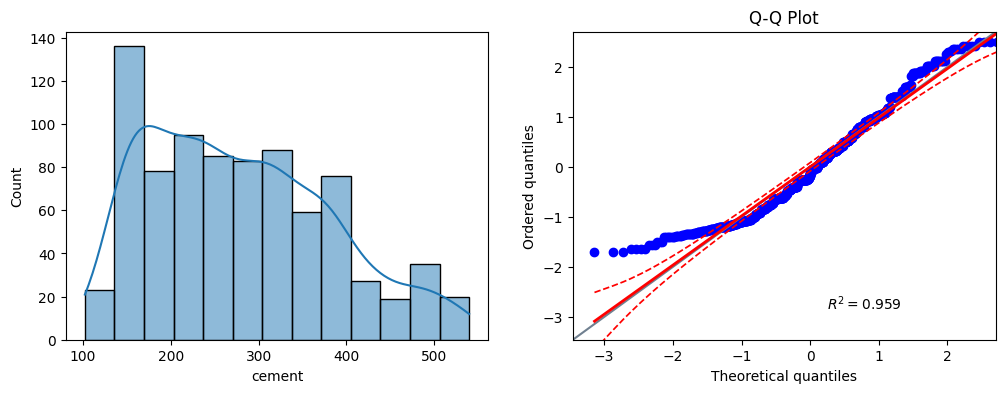

Skewness: 0.5104507965724165, Kurtosis: -0.5518832728776086


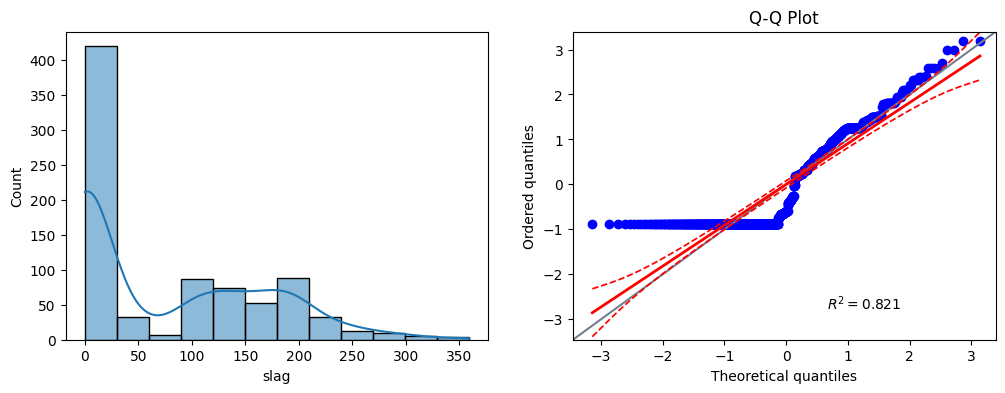

Skewness: 0.725334885469053, Kurtosis: -0.6596135219233679


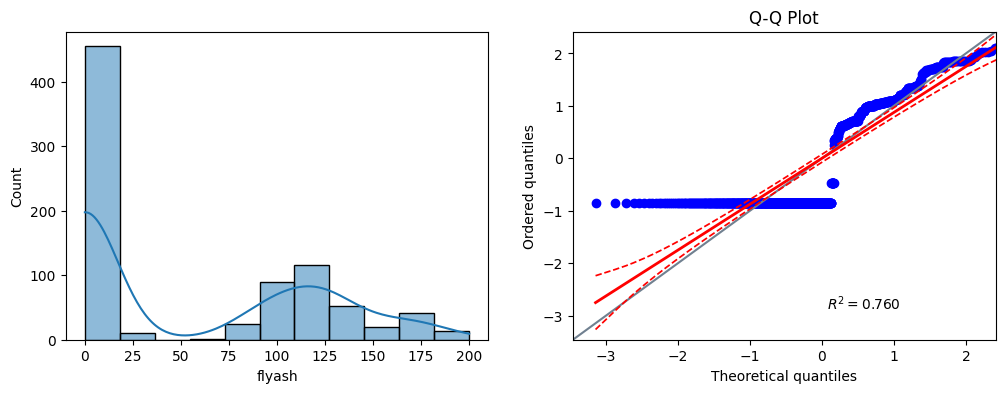

Skewness: 0.5293627914753628, Kurtosis: -1.3545055014100893


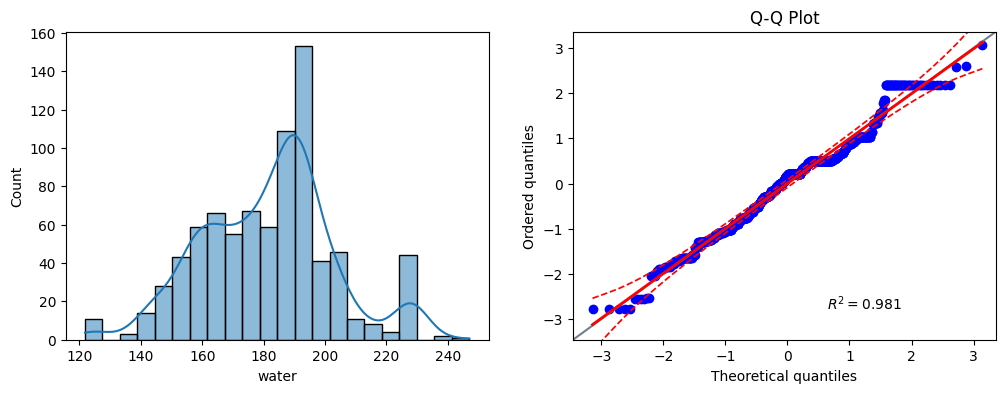

Skewness: 0.04733959276732766, Kurtosis: 0.14708007813422652


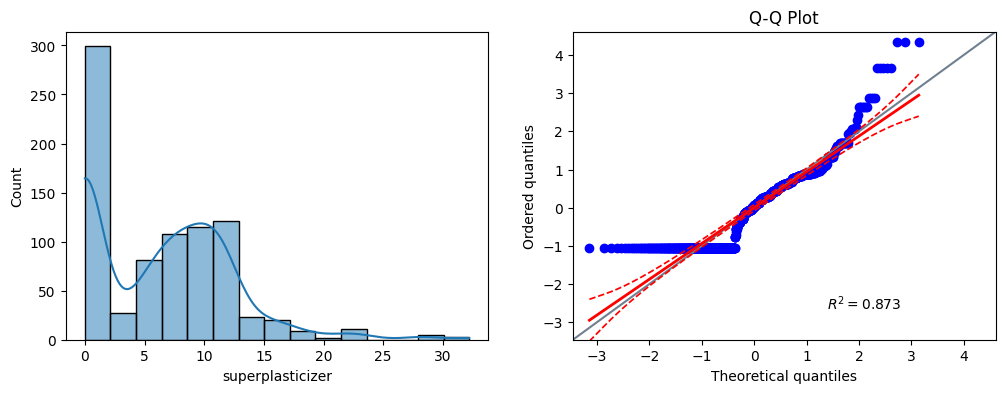

Skewness: 0.8611138983389793, Kurtosis: 1.2252078857870936


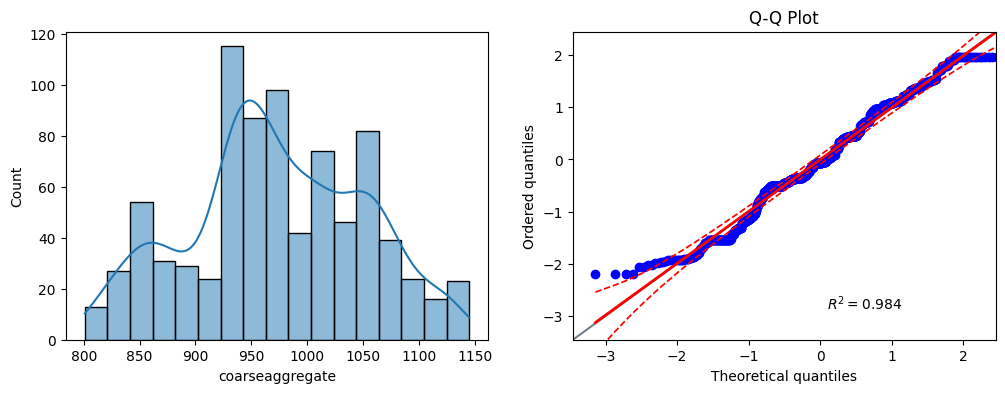

Skewness: -0.03830018148365835, Kurtosis: -0.6304885644013183


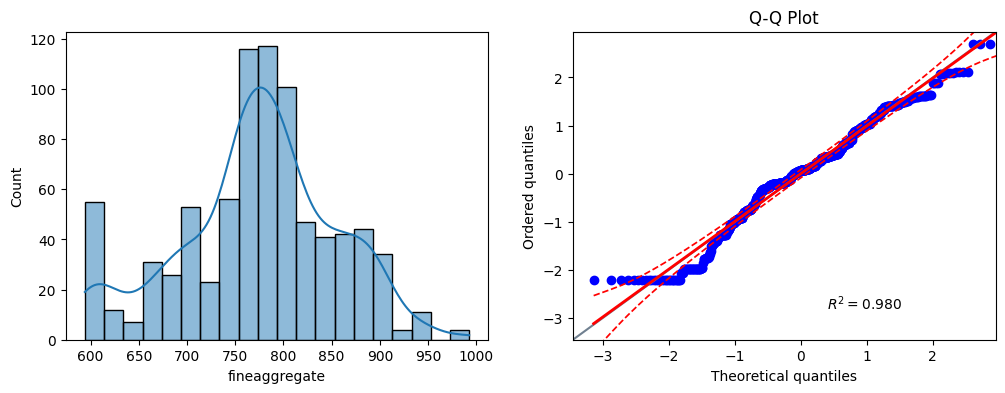

Skewness: -0.24424282188402904, Kurtosis: -0.10365703318996511


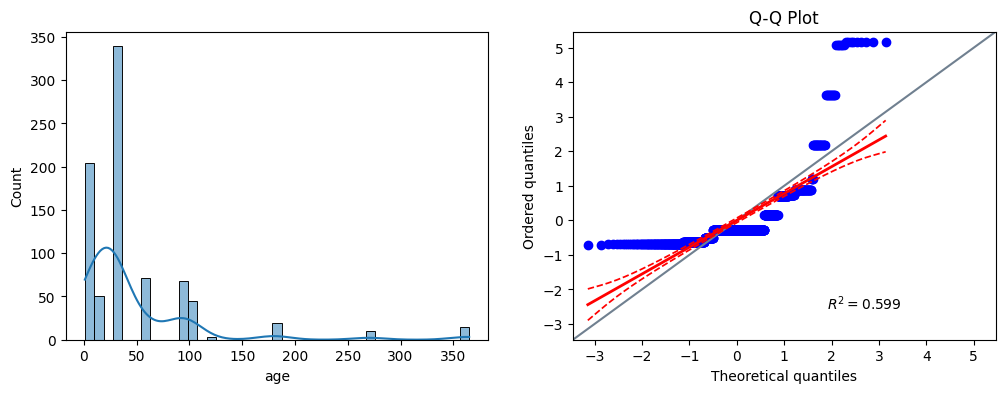

Skewness: 3.270907493725208, Kurtosis: 12.474928319877996


In [8]:
distributions(df_train)

Numerical Variable Transformations - Log transformer, power transformer, reciprocal transformer, Box Cox, Yeo Johnson

Add 1 to all cells to allow for numerical transformations

In [9]:
df_plus_one = df_train.apply(lambda x : x+1)
df_plus_one.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,481.0,1.0,1.0,193.0,1.0,937.0,722.0,29
1,376.0,1.0,1.0,187.0,1.0,1039.0,759.0,29
2,304.6,140.9,1.0,214.5,7.2,896.5,723.5,29
3,252.4,1.0,119.3,189.5,7.4,1029.4,758.7,4
4,501.0,1.0,1.0,201.0,1.0,1126.0,614.0,91


Apply transformations

In [12]:
def feature_engineering_methods(df):
    lt = vt.LogTransformer()
    df_log = lt.fit_transform(df)
    distributions(df_log)

    lt_base_10 = vt.LogTransformer(base='10')
    df_log_10 = lt_base_10.fit_transform(df)
    distributions(df_log_10)


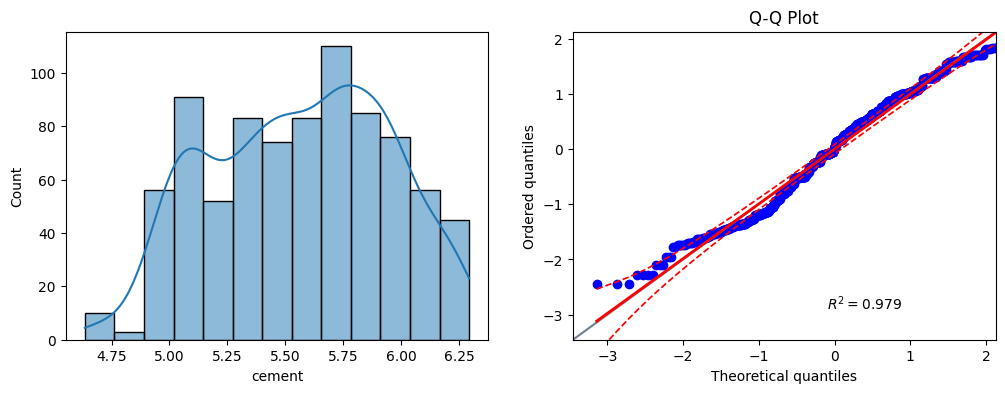

Skewness: -0.11113671346109548, Kurtosis: -0.8978581391628331


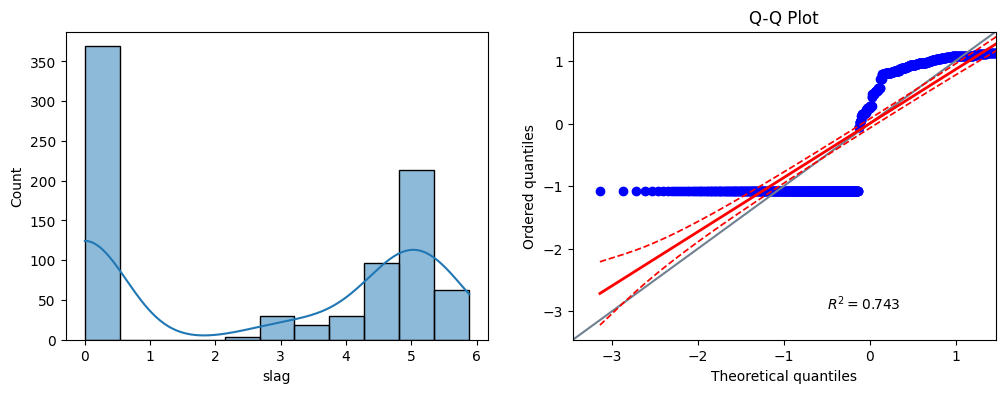

Skewness: -0.07617655161332387, Kurtosis: -1.8792581581418855


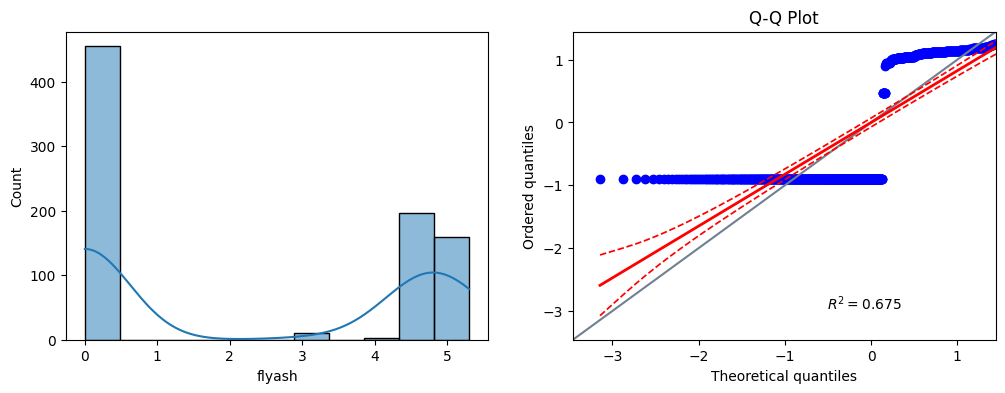

Skewness: 0.2355660021794194, Kurtosis: -1.922446731266305


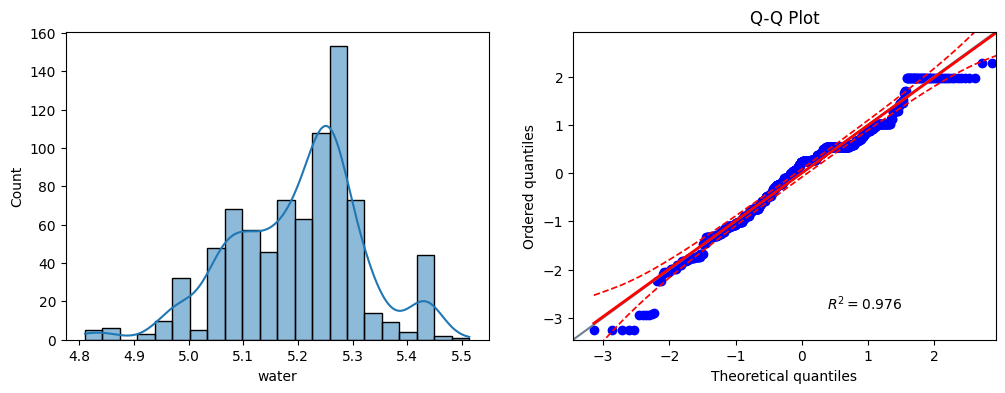

Skewness: -0.3398209448868188, Kurtosis: 0.340759315627452


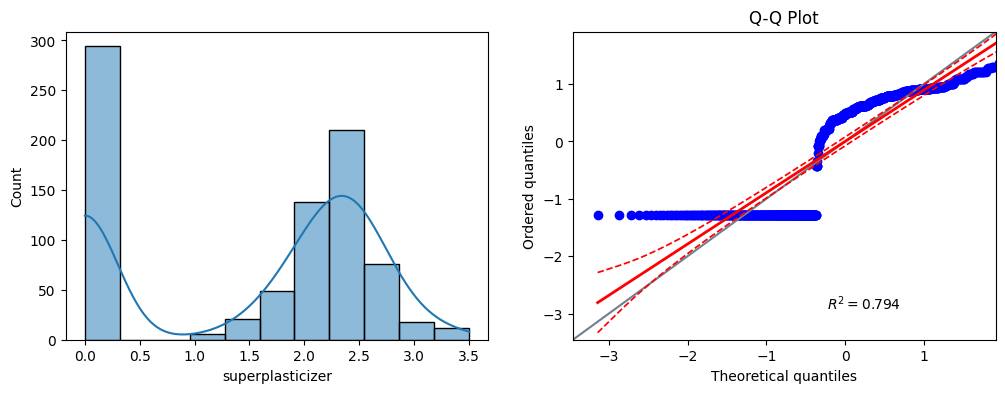

Skewness: -0.36703068212876117, Kurtosis: -1.5825855461570557


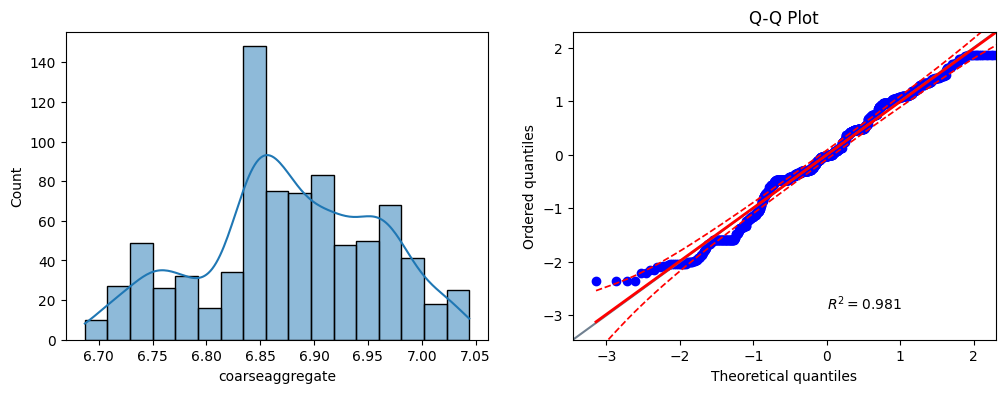

Skewness: -0.20403986540664032, Kurtosis: -0.5781855826113342


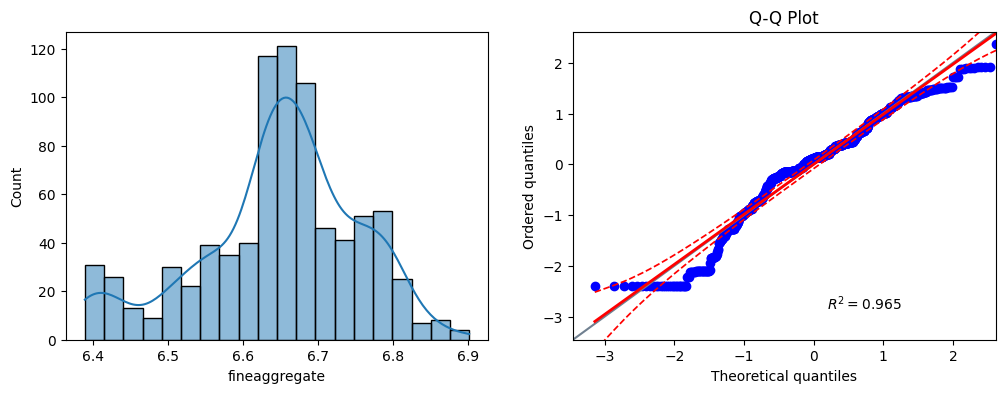

Skewness: -0.5344939305906169, Kurtosis: 0.07438696246806131


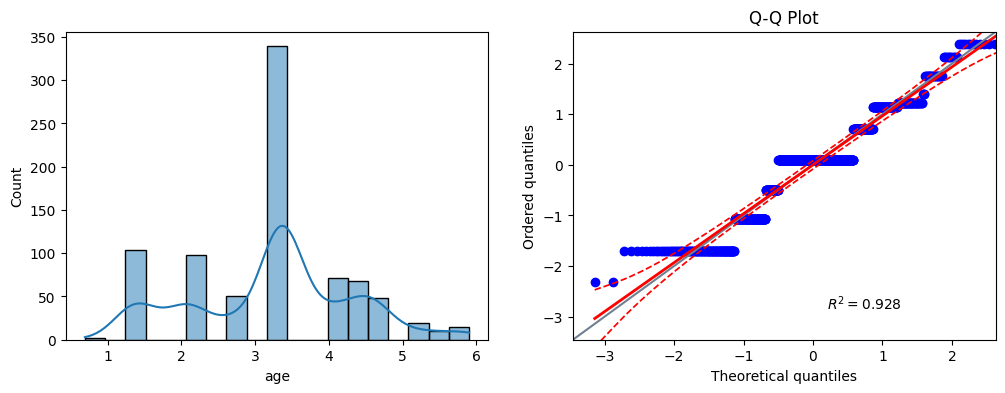

Skewness: -0.0467368547049174, Kurtosis: -0.36561088549258214


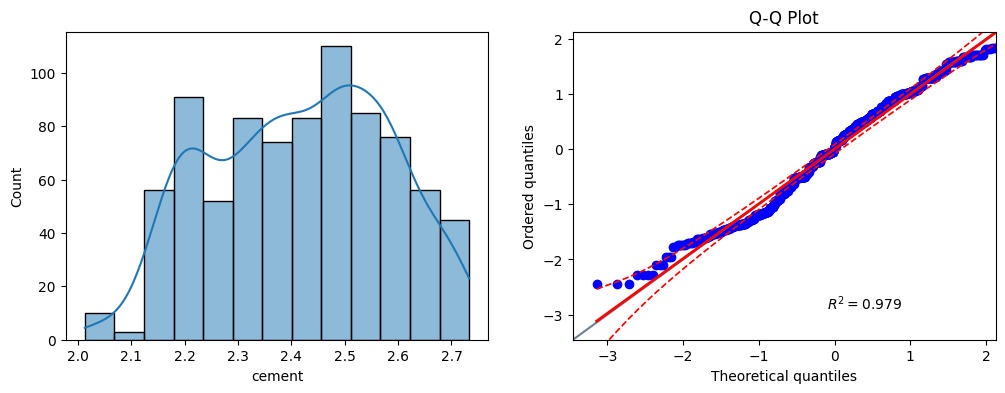

Skewness: -0.11113671346109688, Kurtosis: -0.8978581391628322


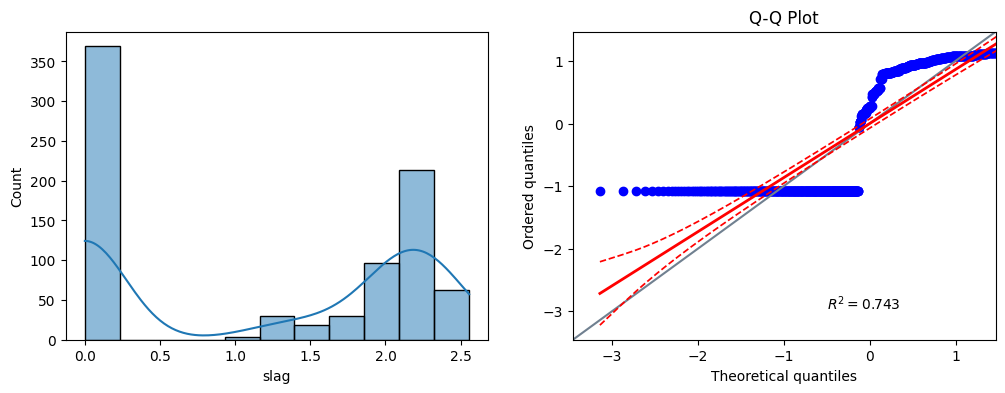

Skewness: -0.07617655161332469, Kurtosis: -1.8792581581418855


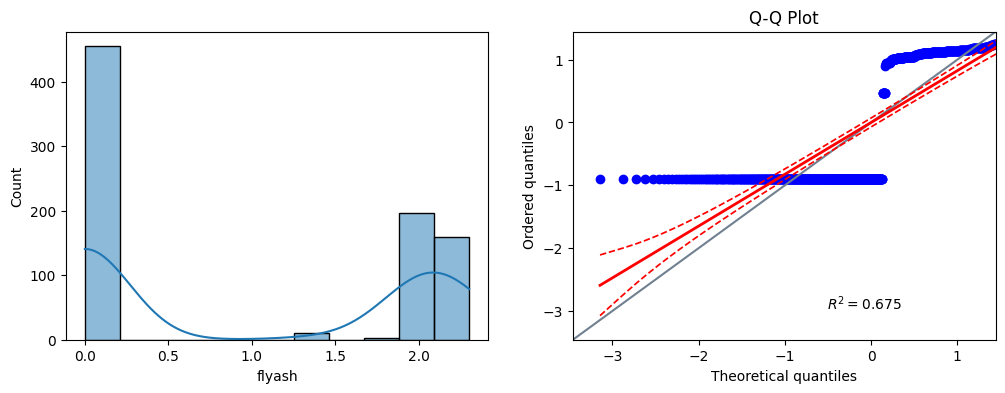

Skewness: 0.23556600217941864, Kurtosis: -1.922446731266306


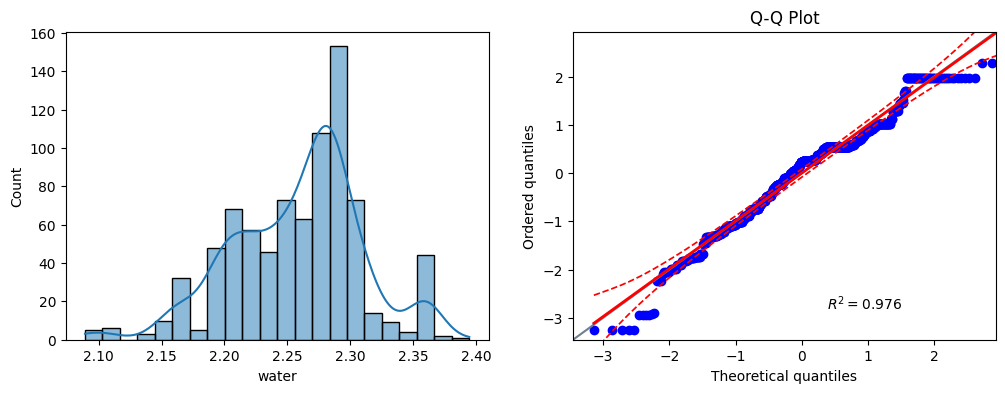

Skewness: -0.339820944886845, Kurtosis: 0.34075931562745776


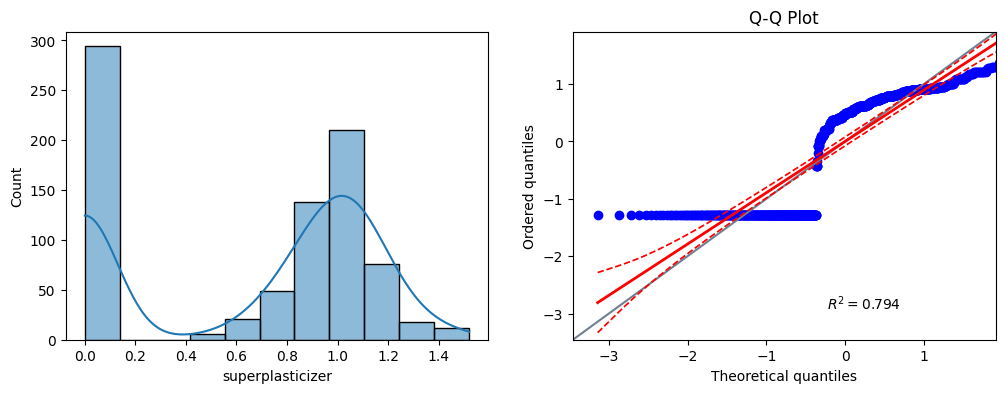

Skewness: -0.3670306821287622, Kurtosis: -1.5825855461570557


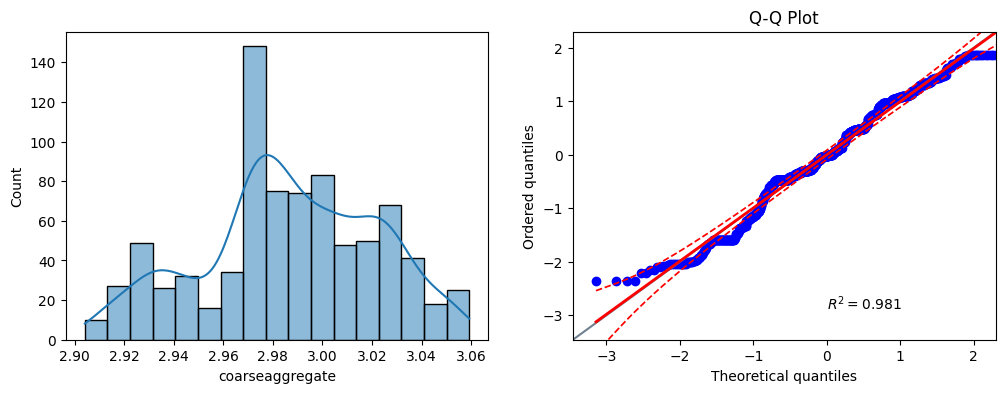

Skewness: -0.20403986540663305, Kurtosis: -0.5781855826113338


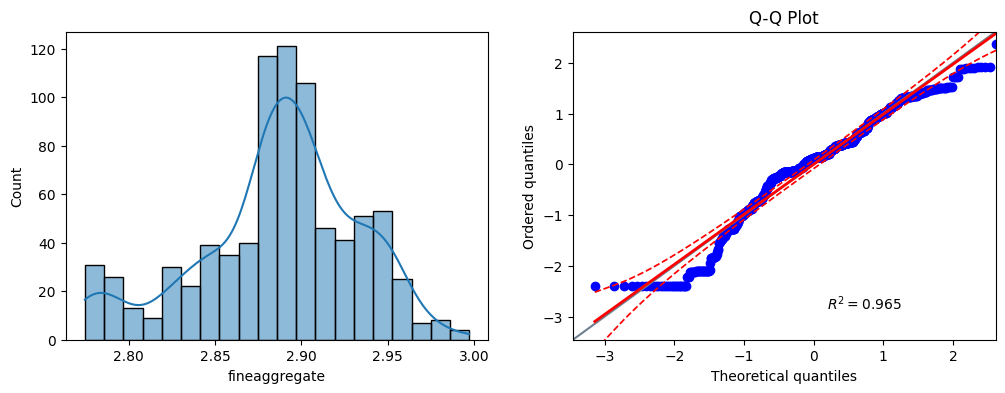

Skewness: -0.5344939305906499, Kurtosis: 0.07438696246808307


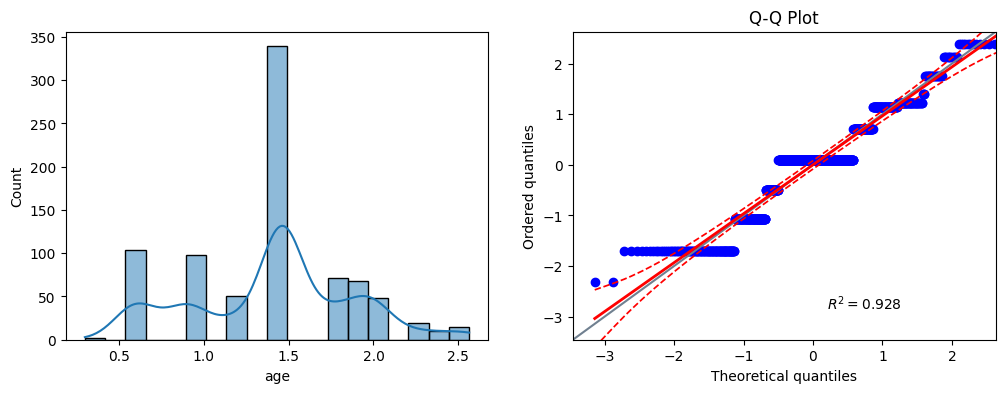

Skewness: -0.04673685470491923, Kurtosis: -0.36561088549258214


In [13]:
feature_engineering_methods(df_plus_one)

NameError: name 'df_log' is not defined

Smart correlated selection